In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
from collections import defaultdict

In [2]:
"""
Read the gzip file, return the decompressed df 
:logfile: filename with gz suffix, i.e.'PeriodicPower.log.gz
Return df
"""
def read_log(logfile):
    with gzip.open(logfile, 'rb') as f:
        df = pd.read_csv(f, delim_whitespace=True)
        return df

In [69]:
df = read_log('PeriodicThermal.log.gz')

In [70]:
df.head()

,L3,C_0_IALU,C_0_FPU,C_0_FPIW,C_0_REN,C_0_ROB,C_0_MMU,C_0_SQ,C_0_BTB,C_0_DC,...,C_3_RBB,C_3_Other,C_3_L2,C_3_IRF,C_3_LQ,C_3_BP,C_3_IC,C_3_IB,C_3_ID,C_3_FPRF
0,45.10,47.78,48.00,47.87,53.82,47.47,53.96,79.44,50.79,45.26,...,46.13,45.22,45.01,45.43,45.54,45.90,45.15,45.54,45.21,48.00
1,45.13,48.26,46.58,46.36,48.16,46.89,48.09,59.85,47.20,45.24,...,46.22,45.34,45.03,45.57,45.58,45.92,45.19,45.57,45.27,48.60
2,45.15,48.35,45.75,45.59,46.54,46.36,46.44,49.87,45.79,45.24,...,46.25,45.40,45.04,45.62,45.59,45.93,45.21,45.59,45.29,48.76
3,45.16,48.38,45.52,45.37,46.37,46.18,46.28,47.31,45.52,45.27,...,46.28,45.44,45.05,45.65,45.61,45.95,45.22,45.60,45.30,48.82
4,45.17,48.39,45.44,45.28,46.31,46.10,46.23,46.37,45.43,45.29,...,46.30,45.46,45.06,45.66,45.62,45.96,45.23,45.61,45.31,48.85


In [71]:
def process_thermal_data(df, cores):
    header_list = df.columns.values
    df_results = {}
    for i in range(cores):
        attr_list = [item for item in header_list if item[:3] == ('C_'+str(i))]     # attribute list of core i
        df_results[i] = {'std':  df[attr_list].std()}
        #df['C_'+str(i)] = df[attr_list].sum(axis=1)   #TODO mode to replace
        #fractions = {item: round(df[item].sum(),pc) for item in attr_list}
        #df_results[i] = {'sum': round(df['C_'+str(i)].sum(), pc),'average': round(df['C_'+str(i)].mean(), pc),\
                         #'std': round(df['C_'+str(i)].std(), pc), 'max':round(df['C_'+str(i)].max(), pc), \
                         #'fraction':fractions}
        
    
    return df,df_results
        

In [72]:
df, df_results=process_thermal_data(df, 4)

In [88]:

# http://matplotlib.org/users/legend_guide.html
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
# https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line
def plot_line_thermal(obj_df, x_label, y_label, title, upper_num = 0, if_reverse = True): # true: descending; false: ascending
    attrs = df_results[0]['std'].to_dict()   # convert pd series object to dict
    
    if upper_num != 0 and upper_num > 0:   # if set the max number of lines, only display the top number lines (by ascending/descending order)
        y_keys = sorted(attrs, key=attrs.get, reverse=if_reverse)[:upper_num]
    else:
        y_keys = attrs.keys()

    x = np.array([i for i in range(obj_df.shape[0])])
    linestyle = [
     (0, (1, 10)),
     (0, (1, 1)),
     (0, (1, 1)),
     (5, (10, 3)),
     (0, (5, 10)),
     (0, (5, 5)),
     (0, (5, 1)),
     (0, (3, 10, 1, 10)),
     (0, (3, 5, 1, 5)),
     (0, (3, 1, 1, 1)),
     (0, (3, 5, 1, 5, 1, 5)),
     (0, (3, 10, 1, 10, 1, 10)),
     (0, (3, 1, 1, 1, 1, 1))]
    markers = ['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
    for i, key in enumerate(y_keys):
        #mark = markers[i] if i < len(markers) else linestyle[i]    # extend if too less markers
        plt.plot(x, obj_df[key], label=key, marker=markers[i])  #, linestyle= linestyle[i]

    # upper right: 1; upper left: 2; lower left: 3; lower right: 4; right: 5; center left: 6; center right: 7; lower center: 8; upper center: 9; center: 10;
    plt.legend(loc=2) 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

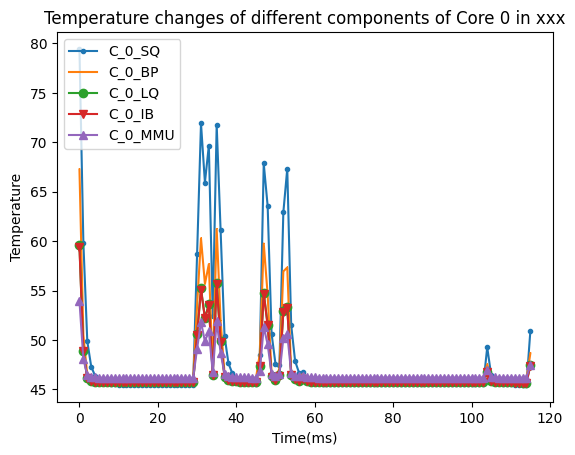

In [89]:
# df_results[0]['std']
x_label = "Time(ms)"
y_label = "Temperature"
title = "Temperature changes of different components of Core 0 in xxx"
plot_line_thermal(df, x_label, y_label, title, 5)